# UFRN Constructions's Finances
On this NoteBook we will present our discoveries over constructions and investments all over UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE([UFRN](www.ufrn.br)).
All this made as a project for a subject on UFRN called `PROBABILIDADE`, where we choose some of several available open data about our university.

## Choosen Data
We decided to work on the financial values over UFRN, like how much money cost a specific work, how long it generally takes to finish a construction, the most expensive work, and so on. For that, we used the following 'csv' files:
- [obras.csv](http://dados.ufrn.br/dataset/a8b897f9-4659-44d4-842e-ac70ae21eb83/resource/067e7cad-934c-4134-a5d5-807915c074b4/download/obras.csv)
- [requisicaoobras.csv](http://dados.ufrn.br/dataset/15f55d0c-7ac8-4c1e-a73c-b0e37b9ef873/resource/0d923d18-1ffa-41d7-972f-33a12e9daf62/download/requisicaoobras.csv)

Importing some useful libs

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Working with *Values*

In this part we will show in numbers and compare the values of the works with the nature of the requests.

Just reading and showing the dataframe we are about to work with

In [11]:
works = pd.read_csv("res/obras.csv", sep=';')
work_requests = pd.read_csv("res/requisicaoobras.csv", sep=';')

#### Works Data Frame

In [12]:
pd.DataFrame(works.head())

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
0,493,CONSTRUÇÃO DO BLOCO H DO SETOR DE AULAS TEÓRIC...,23/03/2005 - 19/11/2005,240,FINALIZADA,6/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 829.454,21",NaN,NaN,NaN,NaN,NaN,NaN
1,521,CONSTRUÇÃO DO BLOCO A1 DO SETOR DE AULAS TEÓRI...,04/05/2005 - 30/12/2005,240,FINALIZADA,7/2004,03.166.687/0001-28 - CRS-CONSTRUÇÕES E EMPREE...,CONCORRÊNCIA,"R$ 833.702,12",NaN,20/04/2005 - 20/11/2005,19O ENECIC/2005 (852005),NaN,NaN,NaN
2,848,CONSTRUÇÃO DO SETOR DE ANTIBIÓTICOS PRODUÇÃO D...,02/06/2005 - 29/01/2006,240,FINALIZADA,4/2004,03.722.669/0001-85 - CONSTRUTORA CAGEO LTDA,CONCORRÊNCIA,"R$ 1.561.230,93",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,252.0,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS,NaN
3,925,Complementação da 2ª Etapa e Realização da 3ª ...,28/01/2005 - 22/01/2006,360,FINALIZADA,2/2004,40.761.454/0001-08 - AR PROJETOS & CONSTRUÇÕE...,CONCORRÊNCIA,"R$ 814.550,74",NaN,20/12/2002 - 31/07/2007,UFRN/CONV.133/02 - HUOL (862003),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN
4,182,CONSTRUÇÃO DO DEPARTAMENTO DE FISIOTERAPIA - CCS,08/02/2006 - 02/02/2007,360,FINALIZADA,1/2005,01.694.415/0001-75 - HASTE-HABITAÇÃO E SERVIÇ...,CONCORRÊNCIA,"R$ 1.455.865,61",NaN,20/12/2004 - 30/03/2010,CONVENIO 121/2004 UFRN (732005),446.0,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES,NaN


#### Work Requests Data Frame

In [13]:
pd.DataFrame(work_requests.head())

,numero,ano,id_unidade_requisitante,nome_unidade_requisitante,id_unidade_custo,nome_unidade_custo,data_envio,descricao,local,observacoes,status,processo
0,1467,2018,445,CENTRO DE TECNOLOGIA,445,CENTRO DE TECNOLOGIA,27/02/2018,REPARO DO FORRO E RECUPERAÇÃO DE PEÇAS METÁLIC...,CENTRO DE TECNOLOGIA - UFRN,"RDC 01/2018 - R$ 40.984,69",CADASTRADA,NaN
1,1463,2018,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,4885,ESCOLA DE CIÊNCIAS E TECNOLOGIA,27/02/2018,RECUPERAÇÃO ESTRUTURAL DA COBERTURA DO PRÉDIO ...,CENTRO DE TECNOLOGIA-UFRN,"RDC 01/2018 - R$ 136.974,42",PENDENTE AUTORIZAÇÃO CHEFE UNIDADE,NaN
2,1388,2018,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,6919,INSTITUTO DE MEDICINA TROPICAL - IMT-RN,23/02/2018,Projeto de sinalização interna e externa do IM...,"Unidade clínica do IMT-RN, ao lado do HGT.",NaN,AUTORIZADA PARA INFRA,NaN
3,1340,2018,3362,ASSESSORIA ADMINISTRATIVA (AS/CT),87,DIREÇÃO DO CENTRO DE TECNOLOGIA,23/02/2018,Conforme parecer técnico realizado pela coorde...,Complexo tecnológico de engenharia (CTEC),Construção de um abrigo para fins de destinaçã...,AUTORIZADA PARA INFRA,NaN
4,927,2018,196,DEPARTAMENTO DE FARMACIA,196,DEPARTAMENTO DE FARMACIA,08/02/2018,DIANTE DA CRIAÇÃO DA PRIMEIRA E ÚNICA EMPRESA ...,LOCAL SE TRATA DE PARTE DA ANTIGA PRAÇA DO XAR...,UNIDADE DE CUSTO CCS.,CADASTRADA,NaN


### 1 ) TODO

In [36]:
# This cell clears the dataset of all unlabeled data

valid_indexes = []
for i,_ in enumerate(works['unidade_responsavel'].isnull()):
    if (_ == False ):
        valid_indexes.append(i)
works_filter = works.loc[valid_indexes]
#pd.DataFrame(works_filter.info())

1.1 ) TODO

In [15]:
pd.DataFrame(works_filter['unidade_responsavel'].value_counts()).head()

,unidade_responsavel
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE,108
CENTRO DE TECNOLOGIA,38
CENTRO DE BIOCIÊNCIAS,27
CENTRO DE CIÊNCIAS EXATAS E DA TERRA,26
CENTRO DE CIÊNCIAS DA SAÚDE,21


1.2 ) Fixing string 'Valor'

We will fix the value column to make it easier to handle on the data. It is important to remember that the works cost before was analyzed with two spaces after a comma being pennies.
Therefore:

Ex. ) `100` = ` RS 1,00` 

In [16]:
df = works_filter.copy()
for index,i in enumerate(df['valor']):
    i = i.replace(" ", "")
    i = i.replace("R$", "")
    i = i.replace(".","")
    i = i.replace(",", "")
    i = int(i)
    df['valor'][index] = i

/home/cyborg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### TODO

In [37]:
dep_names = df['unidade_responsavel'].value_counts().index.tolist()
pd.DataFrame(dep_names).head(10)

,0
0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
1,CENTRO DE TECNOLOGIA
2,CENTRO DE BIOCIÊNCIAS
3,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
4,CENTRO DE CIÊNCIAS DA SAÚDE
5,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
6,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,HOSPITAL UNIVERSITÁRIO ONOFRE LOPES
8,NUCLEO DE PESQUISA EM ALIMENTOS E MEDICAMENTOS
9,ESCOLA AGRÍCOLA DE JUNDIAÍ


In [82]:
values = {}
for i in dep_names:
    values[i] = 0
    
for index,row in df.iterrows():
#     pd.DataFrame(row['unidade_responsavel'])
#     print(row['unidade_responsavel'])
    i = row['valor'].replace(" ", "")
    i = i.replace("R$", "")
    i = i.replace(".","")
    i = i.replace(",", "")
    i = int(i)
    #print(i)
    #print(row['valor'])
    values[row['unidade_responsavel']] += i

Tendo terminado de converter os valores de strings para inteiros, podemos agora ordenar os departamentos pelo valor gasto em obras por cada um.

In [97]:
top11 = {}
## os 11 maiores incluindo o campus do cerebro
big_resources = sorted(values, key=values.get, reverse=True)[:11]
for i in big_resources:
    top11[i] = values[i]
          
#print (top11)
#pd.DataFrame(top6)
campus_cerebro = list(top11.keys())[0]
CT = list(top11.keys())[1]
def without_keys(d, keys):
    return {k: v for k, v in d.items() if k not in keys}
#excluindo o campus do cerebro
top10 = without_keys(top11,list(top11.keys())[0])
#print (top10)

Vejamos agora a lista dos 11 departamentos que mais gastam suas verbas em obras na UFRN:

In [55]:
for names,values in top11.items():
    print (names ,":", values)

CAMPUS DO CÉREBRO : 13542746035
CENTRO DE TECNOLOGIA : 4652257395
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE : 4642647978
ADMINISTRAÇÃO CENTRAL - GASTOS CT : 2559877946
CENTRO DE BIOCIÊNCIAS : 1906259928
CENTRO DE CIÊNCIAS SOCIAIS APLICADAS : 1696968476
CENTRO DE CIÊNCIAS EXATAS E DA TERRA : 1421224590
CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES : 1117356965
CENTRO DE CIÊNCIAS DA SAÚDE : 1087542221
HOSPITAL UNIVERSITÁRIO ONOFRE LOPES : 854753581
SUPERINTENDÊNCIA DE INFRAESTRUTURA : 793802347


Para facilitar a visualização, geremos um gráfico.

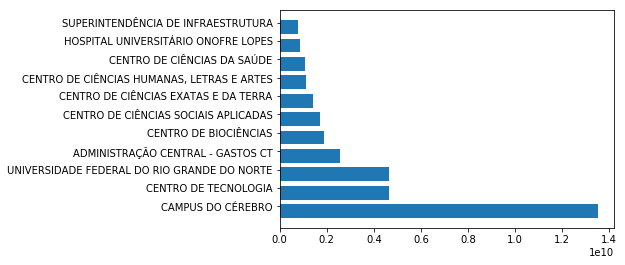

In [91]:
names = list(top11.keys())

fig, ax = plt.subplots()
bar_positions = np.arange(len(names)) + 0.75
xtick_pos = np.arange(len(names)) + 1
ax.set_yticks(xtick_pos)
ax.set_yticklabels(names)
ax.barh(bar_positions, list(top11.values()),0.75)
plt.show()

Estranhamente o campus do cérebro custou muito mais aos cofres publicos
do que todos os outros departamentos, vejamos quais obras foram feitas por ele.


In [68]:
cerebro_list = []
for idx,rows in df.iterrows():
    if (rows['unidade_responsavel'] == campus_cerebro):
        cerebro_list.append(idx)

# As duas obras (caríssimas por sinal) do campus do cérebro
df.loc[cerebro_list]


,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
37,5803,"execução, pela CONTRATADA, da CONSTRUÇÃO DO CE...",11/06/2010 - 22/12/2013,720,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 75.574.557,43",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,5229.0,CAMPUS DO CÉREBRO,NaN
38,5810,CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LA...,14/06/2010 - 31/12/2011,565,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 59.817.003,64",NaN,17/12/2007 - 31/07/2013,FUNPEC/UFRN CONV. 147/2007 - CAMPUS DO CEREBRO...,5229.0,CAMPUS DO CÉREBRO,NaN
350,6814,EXECUÇÃO DE SERVIÇOS DE ARQUITETURA VISANDO À ...,09/05/2011 - 09/11/2012,550,CONTRATO FINALIZADO,1/2011,01.641.113/0001-39 - J. GALBINSK & CIA LTDA.,INEXIGIBILIDADE DE LICITAÇÃO,"R$ 35.899,28",NaN,01/01/2000 - 31/12/2015,MANUTENCAO II (1512001),5229.0,CAMPUS DO CÉREBRO,NaN


In [64]:
cc_describe = df.loc[cerebro_list]
print(cc_describe.iloc[0]['descricao'])
print(cc_describe.iloc[1]['descricao'])

execução, pela CONTRATADA, da CONSTRUÇÃO DO CENTRO DE PESQUISAS, LOCALIZADO NO CAMPUS DO CÉREBRO NA ESCOLA AGRÍCOLA DE JUNDIAÍ - MUNICÍPIO DE MACAÍBA / RN: conforme especificações, anexas a CONCORRÊNCIA Nº 10/2009-DMP.
	Unidade 01 - CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LAPORTA
	 Unidade 02 -  CONSTRUÇÃO DO CENTRO DE PESQUISAS


CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LAPORTA, LOCALIZADO NO CAMPUS DO CÉREBRO NA ESCOLA AGRÍCOLA DE JUNDIAÍ - MUNICÍPIO DE MACAÍBA/RN.


Podemos ver pela celula acima que o custo elevado do campus do cérebro deu-se 
basicamente pela construção em si do próprio campus, visto que o dataset em questão
tem dados somente a partir de 2005, época em que boa parte do campus ja havia sido 
construida.

Estranhamente o IMD nao faz parte do dataset.

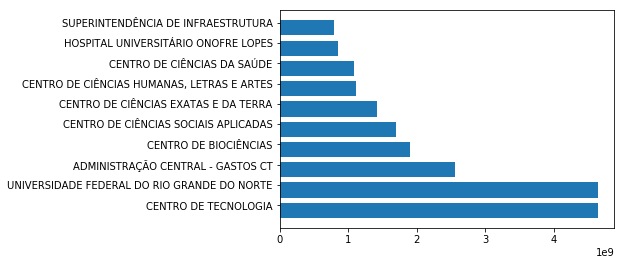

In [101]:
names = list(top10.keys())

fig, ax = plt.subplots()
bar_positions = np.arange(len(names)) + 0.75
xtick_pos = np.arange(len(names)) + 1
ax.set_yticks(xtick_pos)
ax.set_yticklabels(names)
ax.barh(bar_positions, list(top10.values()),0.75)
plt.show()

### Analyzing Works Times
On the next 3 cells, we will check, respectively, a construction's minimun time, max time and the mean of all these times.

In [102]:
# This cell creates 2 variables, one containing the minimun value and the other it's index.
works_min_time = works['qtd_dias'].min()
works_min_index_time = works['qtd_dias'].idxmin()

# Then, we print to observe it's values and costs.
print("The fastest work took",works_min_time,"days")
print("It also cost", works.iloc[works_min_index_time]['valor'])
pd.DataFrame(works.iloc[works_min_index_time])

The fastest work took 5 days
It also cost R$         8.320,70


,277
id_obra,2849
descricao,RECUPERAÇÃO DE ENLACE ÓPTICO NA AV. RODRIGUES ...
periodo,15/01/2007 - 19/01/2007
qtd_dias,5
status_obra,FINALIZADA
licitacao,585/2006
empresa,01.009.821/0001-51 - PROTELE ENGENHARIA LTDA
modalidade,DISPENSA DE LICITAÇÃO
valor,"R$ 8.320,70"
fonte_recurso,UNIV.FEDERAL DO RIO GRANDE DO NORTE (250154214)


In [103]:
# This cell creates 2 variables, one containing the maximun value and the other it's index.
works_max_time = works['qtd_dias'].max()
works_max_index_time = works['qtd_dias'].idxmax()

# Then, we print to observe it's values and costs.
print("The slowest work took",works_max_time,"days")
print("It also cost", works.iloc[works_max_index_time]['valor'])
pd.DataFrame(works.iloc[works_max_index_time])

The slowest work took 1306 days
It also cost R$       272.555,36


,548
id_obra,5931
descricao,O PRESENTE CONTRATO TEM COMO OBJETO A EXECUÇÃO...
periodo,15/07/2007 - 09/08/2011
qtd_dias,1306
status_obra,FINALIZADA
licitacao,4/2010
empresa,05.937.949/0001-36 - ATUAL ENGENHARIA E SERVI...
modalidade,TOMADA DE PREÇO
valor,"R$ 272.555,36"
fonte_recurso,TESOURO - EDUCAÇÃO (112000000)


In [104]:
works_mean_time = works['qtd_dias'].mean()
print( int(works_mean_time),"is the mean amount of days taken to finish a construction on UFRN")

184 is the mean amount of days taken to finish a construction on UFRN


### Considerations
After our analysis over times, we concluded that UFRN actually takes approximately 6 months for a construction to be finished.

In [105]:
less_than_mean = 0
for i in works.qtd_dias:
    if i < works_mean_time:
        less_than_mean = less_than_mean + 1
        
amount_works = len(works.id_obra)
print(less_than_mean)
print(int (less_than_mean*100/amount_works),"%")

# Most of works done on UFRN are faster than the mean time.

511
61 %


### Information on Requested Works
Following we will start our abstractions over the requested works of UFRN's departments.

For example, as we can see on the next cell, the department that made more requests is SuperIntendencia de Infraestrutura. 

In [106]:
print(work_requests['nome_unidade_requisitante'].value_counts()[:10])
# SuperIntendencia de Infraestrutura has more than double requests than the second most requester(Residencias Universitárias).
print(type(work_requests['nome_unidade_requisitante'].value_counts()[:10]))

SUPERINTENDÊNCIA DE INFRAESTRUTURA             505
RESIDENCIAS UNIVERSITÁRIAS                     222
UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE    186
PRÓ-REITORIA DE ADMINISTRAÇÃO (PROAD)          160
CENTRO DE BIOCIÊNCIAS                          160
DIRETORIA DE OBRAS                             144
CENTRO DE CIÊNCIAS DA SAÚDE                    134
HOSPITAL UNIVERSITÁRIO ONOFRE LOPES            134
DIREÇÃO DO CCSA                                129
ESCOLA AGRÍCOLA DE JUNDIAÍ                     116
Name: nome_unidade_requisitante, dtype: int64
<class 'pandas.core.series.Series'>


### 2 ) Most expensive Work
The most expensive work was on Campus do Cérebro, researching about it we found that the Campus is located in Macaiba. According to the work description, the money was invested in the construction of the Lygia Maria Rocha Leão Laporta school and in the construction of the Search center. Because it is a project of an environment of academic studies focused on the neurological medical area it is justified the cost of about 76 million reais, The work took 2 years to finish. 

2.1 ) This cell shows in detail the two works carried out on the Campus do Cérebro.

In [107]:
cerebro_list = []
CT_list = []
for idx,rows in df.iterrows():
    if (rows['unidade_responsavel'] == CT):
        CT_list.append(idx)
    elif (rows['unidade_responsavel'] == campus_cerebro):
        cerebro_list.append(idx)
        
df.loc[cerebro_list]

,id_obra,descricao,periodo,qtd_dias,status_obra,licitacao,empresa,modalidade,valor,fonte_recurso,vigencia_projeto,projeto,id_unidade_responsavel,unidade_responsavel,Unnamed: 14
37,5803,"execução, pela CONTRATADA, da CONSTRUÇÃO DO CE...",11/06/2010 - 22/12/2013,720,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 75.574.557,43",TESOURO - EDUCAÇÃO (112000000),NaN,NaN,5229.0,CAMPUS DO CÉREBRO,NaN
38,5810,CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LA...,14/06/2010 - 31/12/2011,565,FINALIZADA,10/2009,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...,CONCORRÊNCIA,"R$ 59.817.003,64",NaN,17/12/2007 - 31/07/2013,FUNPEC/UFRN CONV. 147/2007 - CAMPUS DO CEREBRO...,5229.0,CAMPUS DO CÉREBRO,NaN
350,6814,EXECUÇÃO DE SERVIÇOS DE ARQUITETURA VISANDO À ...,09/05/2011 - 09/11/2012,550,CONTRATO FINALIZADO,1/2011,01.641.113/0001-39 - J. GALBINSK & CIA LTDA.,INEXIGIBILIDADE DE LICITAÇÃO,"R$ 35.899,28",NaN,01/01/2000 - 31/12/2015,MANUTENCAO II (1512001),5229.0,CAMPUS DO CÉREBRO,NaN


2.2 ) This cell shows a Picture of the Campus do Cérebro during the construction

In [108]:
import tkinter as tk
root = tk.Tk()

imagem = tk.PhotoImage(file = "campus_cerebro.png")
w = tk.Label(root, image=imagem)
w.imagem = imagem
w.pack()

root.mainloop()

TclError: couldn't open "campus_cerebro.png": no such file or directory

2.3 ) Here we use the data to find the most expensive done or in progress work

In [109]:
most_exp_work = works['valor'].max()

this = 0

print("The most expensive work cost was:", most_exp_work)

for i,valor in enumerate(works['valor']):
    if(valor == most_exp_work):
        this = i    
        
print("Work: ", works['unidade_responsavel'][this])        
print("\nDescription: ", works['descricao'][this])

pd.DataFrame(works.iloc[this])

The most expensive work cost was: R$    75.574.557,43
Work:  CAMPUS DO CÉREBRO

Description:  execução, pela CONTRATADA, da CONSTRUÇÃO DO CENTRO DE PESQUISAS, LOCALIZADO NO CAMPUS DO CÉREBRO NA ESCOLA AGRÍCOLA DE JUNDIAÍ - MUNICÍPIO DE MACAÍBA / RN: conforme especificações, anexas a CONCORRÊNCIA Nº 10/2009-DMP.
	Unidade 01 - CONSTRUÇÃO DA ESCOLA LYGIA MARIA ROCHA LEÃO LAPORTA
	 Unidade 02 -  CONSTRUÇÃO DO CENTRO DE PESQUISAS




,37
id_obra,5803
descricao,"execução, pela CONTRATADA, da CONSTRUÇÃO DO CE..."
periodo,11/06/2010 - 22/12/2013
qtd_dias,720
status_obra,FINALIZADA
licitacao,10/2009
empresa,86.712.247/0001-56 - EDCON - COMÉRCIO E CONST...
modalidade,CONCORRÊNCIA
valor,"R$ 75.574.557,43"
fonte_recurso,TESOURO - EDUCAÇÃO (112000000)


### 3 ) Cheaper Work

In [ ]:
most_cheap_work = works['valor'].min()

print("The most cheap work cost was:", most_cheap_work)

this = 0

for i,valor in enumerate(works['valor']):
    if(valor == most_cheap_work):
        this = i
        
print("Work: ", works['unidade_responsavel'][this])
print("\nDescription: ", works['descricao'][this])

pd.DataFrame(works.iloc[this])

In [ ]:
# works_cost_mean = works['valor'].mean()
# print("The Works coust mean was:", works_cost_mean)

### 4. Valor

In [ ]:
years = work_requests.copy()
yr = work_requests['ano'].value_counts()

print("Works per year:")
yea = pd.DataFrame(yr)
yea.head()

In [ ]:
work_requests.plot(kind='hist', y = 'ano', bins=30, figsize=(15,8), color = 'purple', alpha=0.3)
plt.xlabel('Years')
plt.title("Request per Year")
plt.show()

### 5. Status 

In [ ]:
status = work_requests.copy()
sta = work_requests['status'].value_counts()

print("The work requests number by status:")

stat = pd.DataFrame(sta)
soma_fim = stat[stat.index.str.contains('FINALIZADA')].sum()
soma_pend = stat[stat.index.str.contains('PENDENTE')].sum()
stat.loc['FINALIZADAS'] = [soma_fim['status']]
stat.loc['PENDENTE AUTORIZAÇÃO'] = [soma_pend['status']]
pure_stat = stat.drop(index = ['FINALIZADA_ATENDIMENTO','FINALIZADA'])
final_stat = pure_stat.drop(index = ['ENVIADA_LICITACAO','AUTORIZADA PELO CHEFE DA UNIDADE','CADASTRADA',
                            'ENVIADA','RETORNADA','ATENDIDA_LICITACAO','AUTORIZADA PARA INFRA',
                            'AUTORIZADA DIREÇÃO CENTRO','AUTORIZADA PARA LICITAÇÃO',
                            'PENDENTE AUTORIZAÇÃO CHEFE UNIDADE','PENDENTE AUTORIZAÇÃO CHEFIA'])

porce = final_stat/pure_stat.sum()*100
porce

->>>>

In [ ]:
explode = (0.1, 0.1, 0.1, 0.1, 0.3, 0.1, 0.1, 0.1, 0.3, 0.1)
labels = porce.index
fig = plt.figure(figsize=(15,8))
plt.pie(porce, explode=explode, autopct='%1.1f%%',shadow=True, startangle=30, radius=0.9)
plt.axis('equal')
plt.legend(loc='best',labels=labels, bbox_to_anchor=(-0.1,0.6))
plt.title("Work Requests Status")
plt.show()